# **Prediction of Load Approval Status**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.shape

(4269, 13)

In [5]:
df.isnull().count()

loan_id                      4269
 no_of_dependents            4269
 education                   4269
 self_employed               4269
 income_annum                4269
 loan_amount                 4269
 loan_term                   4269
 cibil_score                 4269
 residential_assets_value    4269
 commercial_assets_value     4269
 luxury_assets_value         4269
 bank_asset_value            4269
 loan_status                 4269
dtype: int64

In [14]:
df.nunique()

 no_of_dependents              6
 education                     2
 self_employed                 2
 income_annum                 98
 loan_amount                 378
 loan_term                    10
 cibil_score                 601
 residential_assets_value    278
 commercial_assets_value     188
 luxury_assets_value         379
 bank_asset_value            146
 loan_status                   2
dtype: int64

In [6]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [8]:
df.drop(labels=['loan_id'],axis=1,inplace=True)

In [9]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [11]:
df[' education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [12]:
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df[' education']=encoder.fit_transform(df[' education'])
df[' self_employed']=encoder.fit_transform(df[' self_employed'])
df[' loan_status']=encoder.fit_transform(df[' loan_status'])

In [16]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [17]:
df.dtypes

 no_of_dependents            int64
 education                   int64
 self_employed               int64
 income_annum                int64
 loan_amount                 int64
 loan_term                   int64
 cibil_score                 int64
 residential_assets_value    int64
 commercial_assets_value     int64
 luxury_assets_value         int64
 bank_asset_value            int64
 loan_status                 int64
dtype: object

In [22]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [24]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000


In [25]:
y.head()

0    0
1    1
2    1
3    1
4    1
Name:  loan_status, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [40]:
X_test.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,5,0,0,5400000,19700000,20,423,6500000,10000000,15700000,7300000
1173,2,0,0,5900000,14000000,8,599,4700000,9500000,17800000,6700000
308,3,0,0,9600000,19900000,14,452,4200000,16200000,28500000,6600000
1322,2,0,0,6200000,23400000,8,605,10000000,10800000,21800000,9200000
3271,3,1,1,5800000,14100000,12,738,11700000,4400000,15400000,8400000


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [31]:
models={
    'Logistic Regression :':LogisticRegression(),
    'Decision Tree :' :DecisionTreeClassifier(),
    'Random Forest :' :RandomForestClassifier(),
    'Support Vector :' :SVC(),
    'Naive Bayes :' :GaussianNB()
}

In [32]:
from sklearn.metrics import accuracy_score
def evaluate(X_train,y_train,X_test,y_test,models):
  report={}
  for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    score=accuracy_score(y_test,y_pred)
    report[list(models.keys())[i]]=score
  return report


In [48]:
report=evaluate(X_train,y_train,X_test,y_test,models)
print(report)

{'Logistic Regression :': 0.7274662881476224, 'Decision Tree :': 0.9772888573456352, 'Random Forest :': 0.9779985805535841, 'Support Vector :': 0.6295244854506742, 'Naive Bayes :': 0.7714691270404542}


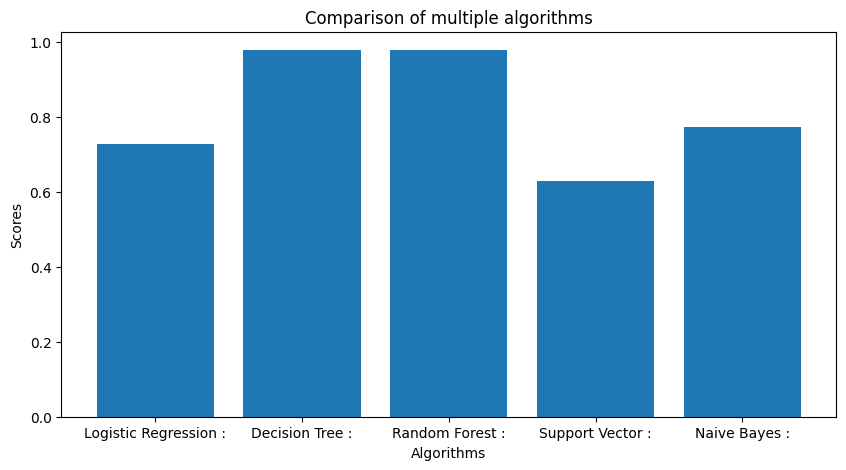

In [56]:

plt.figure(figsize=(10,5))
plt.bar(list(report.keys()),list(report.values()))
plt.xlabel("Algorithms")
plt.ylabel("Scores")
plt.title("Comparison of multiple algorithms")
plt.show()

In [57]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [78]:
X.head(2)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000


In [101]:
def prediction(l):
  if model.predict(l)==0:
    print("Approved")
  else:
    print("Rejected")


In [105]:
l1=[[5,	0,	0,	5400000,	19700000,	20,	423,	6500000	,10000000,	15700000,	7300000]]
prediction(l1)

Rejected


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [104]:
l2=[[2	,0,	0,	9600000,	29900000,	12	,778,	2400000,	17600000,	22700000	,8000000]]
prediction(l2)

Approved


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [58]:
import pickle
pickle.dump(model,open('Randomforest.pkl','wb'))


In [59]:
pickle.dump(encoder,open('LabelEncoder.pkl','wb'))

In [60]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.5 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

In [61]:
import gradio as gr
import joblib



In [107]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [119]:
import gradio as gr
import pandas as pd
model = joblib.load('/content/Randomforest.pkl')
label_encoder = joblib.load('/content/LabelEncoder.pkl')

# Define function to predict loan status
def predict_loan_status(no_of_dependents, education, self_employed, income_annum, loan_amount,
                        loan_term, cibil_score, residential_assets_value, commercial_assets_value,
                        luxury_assets_value, bank_asset_value):

    new_data = pd.DataFrame([[no_of_dependents, education, self_employed, income_annum, loan_amount,
                              loan_term, cibil_score, residential_assets_value, commercial_assets_value,
                              luxury_assets_value, bank_asset_value]],
                            columns=X.columns)

    new_data[' education'] = label_encoder.fit_transform(new_data[' education'])
    new_data[' self_employed'] = label_encoder.fit_transform(new_data[' self_employed'])

    prediction = model.predict(new_data)

    if prediction == 0:
      return "Approved"
    else:
      return "Rejected"
    #predicted_status_label = label_encoder['loan_status'].inverse_transform(prediction)




In [122]:
input_components = [
    gr.Number(label="Number of Dependents"),
    gr.Radio(choices=['Graduate', 'Not Graduate'], label="Education"),
    gr.Radio(choices=['Yes', 'No'], label="Self Employed"),
    gr.Number(label="Annual Income"),
    gr.Number(label="Loan Amount"),
    gr.Number(label="Loan Term"),
    gr.Number(label="CIBIL Score"),
    gr.Number(label="Residential Assets Value"),
    gr.Number(label="Commercial Assets Value"),
    gr.Number(label="Luxury Assets Value"),
    gr.Number(label="Bank Asset Value")
]

output_component = gr.Textbox(label="Predicted Loan Status", lines=3, placeholder="Prediction will appear here...")

interface=gr.Interface(fn=predict_loan_status, inputs=input_components, outputs=output_component, title="Loan Status Prediction")

In [123]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://26f42b58e29db819e8.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
